# BIG MART SALES PREDICTION 

# 1. Problem Statement

Develop a machine learning model to predict the sales of individual products at various BigMart stores. This model should utilize historical sales data, product attributes, and store information to provide accurate sales forecasts. The goal is to optimize inventory management, stocking, and overall sales strategy for improved profitability and customer satisfaction.

# Objectives

Develop a machine learning model that can predict the sales of individual products in different BigMart stores.




Use historical sales data, product information, and store attributes to train the model.



Optimize the model's performance to minimize the mean squared error (MSE) or other relevant evaluation metrics.




Provide insights and recommendations for inventory management and sales strategy based on the model's predictions.

# 2. Data Dictionary


#### 'Item_Identifier': An identifier for each specific item.

#### 'Item_Weight': The weight of the item.

#### 'Item_Fat_Content': The fat content of the item.

#### 'Item_Visibility': The visibility of the item in the store.

#### 'Item_Type': The type/category of the item.

#### 'Item_MRP': The Maximum Retail Price of the item.

#### 'Outlet_Identifier': An identifier for the specific outlet or store.

#### 'Outlet_Establishment_Year': The year the outlet was established.

#### 'Outlet_Size': The size of the outlet.

#### 'Outlet_Location_Type': The location type of the outlet.

#### 'Outlet_Type': The type of outlet.

#### 'Item_Outlet_Sales': The sales of the item in the specific outlet.

#### 'Purchase_date': The date of purchase.

#### 'Purchase_Qnty': The quantity of the item purchased.

#### 'Customer_ID': The identifier of the customer.

#### 'Product_Item': The specific product item.

#### 'Discount': The discount on the item.

# 3. Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
LabelEncoder = LabelEncoder()
standard_scale = StandardScaler()
ordinalEncoder = OrdinalEncoder()
from sklearn.model_selection import train_test_split

In [3]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
df = pd.read_csv("Big Mart Sales Data.csv")

# 4. Exploratory Data Analysis

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Purchase_date,Purchase_Qnty,Customer_ID,Product_Item,Discount
0,FDE51,175.85,LF,0.01,Others,847.50,OUT010,2003,Medium,Tier 1,Grocery Store,343673.25,07-03-2022,406,100018,Distilled Water,0.00
1,FDC37,52.94,Regular,0.15,Meat,1442.25,OUT017,1998,Small,Tier 3,Supermarket Type2,216188.25,09-06-2022,153,100013,Chunky Salsa Medium,57.69
2,FDS46,97.69,Regular,0.82,Soft Drinks,3669.00,OUT045,1998,High,Tier 3,Supermarket Type3,334670.25,05-02-2022,94,100012,French Baguettes,146.76
3,FDV38,102.17,Regular,0.90,Starchy Foods,3419.25,OUT013,2006,High,Tier 2,Supermarket Type3,514734.00,10-11-2022,152,100009,2% Reduced Fat Milk,45.59
4,FDV38,163.37,Regular,0.12,Soft Drinks,4035.75,OUT010,1999,Medium,Tier 1,Supermarket Type3,468666.75,12-04-2022,117,100017,Organic Black Beans,53.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,FDC14,97.26,LF,0.40,Household,3636.00,OUT010,2002,Small,Tier 1,Supermarket Type1,400149.75,21-12-2022,114,100001,Meyer Lemon,193.92
99995,FDU28,28.08,Low,0.56,Breads,2162.25,OUT019,2004,Medium,Tier 3,Grocery Store,608761.50,07-03-2022,285,100019,Combination Pizza Rolls,86.49
99996,FDX07,110.01,Fat,0.50,Frozen Foods,3939.00,OUT013,2006,High,Tier 1,Supermarket Type3,219471.00,30-05-2022,61,100004,Bag of Organic Bananas,262.60
99997,FDX07,137.20,reg,0.30,Health and Hygiene,3453.00,OUT013,2001,High,Tier 2,Supermarket Type3,783142.50,02-05-2022,229,100020,Cherubs Heavenly Salad Tomatoes,92.08


In [6]:
df.shape

(99999, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            99999 non-null  object 
 1   Item_Weight                99999 non-null  float64
 2   Item_Fat_Content           99999 non-null  object 
 3   Item_Visibility            99999 non-null  float64
 4   Item_Type                  99999 non-null  object 
 5   Item_MRP                   99999 non-null  float64
 6   Outlet_Identifier          99999 non-null  object 
 7   Outlet_Establishment_Year  99999 non-null  int64  
 8   Outlet_Size                74692 non-null  object 
 9   Outlet_Location_Type       99999 non-null  object 
 10  Outlet_Type                99999 non-null  object 
 11  Item_Outlet_Sales          99999 non-null  float64
 12  Purchase_date              99999 non-null  object 
 13  Purchase_Qnty              99999 non-null  int

In [8]:
df.isnull().sum()

Item_Identifier                  0
Item_Weight                      0
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                  25307
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
Purchase_date                    0
Purchase_Qnty                    0
Customer_ID                      0
Product_Item                     0
Discount                         0
dtype: int64

In [9]:
df.nunique()

Item_Identifier                 37
Item_Weight                  16381
Item_Fat_Content                 5
Item_Visibility                101
Item_Type                       16
Item_MRP                      9042
Outlet_Identifier               10
Outlet_Establishment_Year       13
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales            95415
Purchase_date                  365
Purchase_Qnty                 1165
Customer_ID                     21
Product_Item                   161
Discount                     23573
dtype: int64

# 4.1 Data Cleaning

In [10]:
df.duplicated().sum()

0

##### There is no duplication in dataset.

In [11]:
df.drop(["Customer_ID","Purchase_date","Item_Identifier","Product_Item","Outlet_Establishment_Year"],axis=1, inplace=True)

##### 👉 Features such as 'Unnamed: 0' and ' Purchase_date' were dropped from the dataset during preprocessing, as they were deemed irrelevant for making accurate predictions.

In [12]:
# --- Transform 'Low Fat' Incosistent Values ---
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

# --- Transform 'Regular' Incosistent Values ---
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Low', 'Low Fat')

# 4.2 Descriptive Statistics

In [14]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [15]:
df_num.std()

Item_Weight              36.585761
Item_Visibility           0.288461
Item_MRP               1456.375984
Item_Outlet_Sales    213561.999739
Purchase_Qnty           129.831981
Discount                107.120603
dtype: float64

##### 👉 Remove Variables with Low Standard Deviation

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,99999.0,98.122749,36.585761,8.77,71.800,98.29,124.480,187.55
Item_Visibility,99999.0,0.500206,0.288461,0.00,0.250,0.50,0.750,1.00
Item_MRP,99999.0,3935.710145,1456.375984,399.75,2887.500,3938.25,4977.375,7488.75
Item_Outlet_Sales,99999.0,525030.957640,213561.999739,4463.25,371627.625,524169.75,678785.625,1046683.50
Purchase_Qnty,99999.0,166.162512,129.831981,1.00,92.000,136.00,199.000,2499.00
Discount,99999.0,131.018505,107.120603,0.00,46.720,112.38,201.540,498.95


##### 👉 1. Item_Weight Distribution: The mean item weight is approximately 98.12 with a standard deviation of 36.59. The weights range from a minimum of 8.77 to a maximum of 187.55. About 50% of the items have a weight between 71.80 and 124.48. This indicates a moderate variability in the weights of the items being considered.

##### 👉 2. Outlet Establishment Year: The average year of establishment for the outlets is approximately 2004, with a standard deviation of 3.74. The data ranges from a minimum of 1998 to a maximum of 2010. This suggests that the majority of the outlets were established in the early 2000s.

##### 👉 3. Item_Outlet_Sales Distribution: The mean item outlet sales are 525030.96 with a standard deviation of 213561.99. The sales range from a minimum of 4463.25 to a maximum of 1046683.50. About 50% of the sales fall between 371627.63 and 678785.63. This indicates a wide variability in the sales figures, with some outlets performing significantly better than others.

In [17]:
df.describe(include=object).T

,count,unique,top,freq
Item_Fat_Content,99999,2,Low Fat,60229
Item_Type,99999,16,Breakfast,6397
Outlet_Identifier,99999,10,OUT045,10091
Outlet_Size,74692,3,Small,25202
Outlet_Location_Type,99999,3,Tier 3,33446
Outlet_Type,99999,4,Supermarket Type2,25145


##### 👉 1. Item Identifier and Frequency: The 'Item_Identifier' column has 37 unique values with 'DRH01' being the most frequent identifier, occurring 2840 times, suggesting a high occurrence of certain items in the dataset.

##### 👉 2. Outlet Size Distribution: The 'Outlet_Size' column has 3 unique values with 'Small' being the most frequent size, occurring 25202 times out of 74692 data points, indicating that a significant portion of the outlets in the dataset are classified as small.

##### 👉 3. Outlet Type Distribution: The 'Outlet_Type' column has 4 unique values with 'Supermarket Type2' being the most frequent type, appearing 25145 times, implying that this particular type is predominant within the dataset compared to other outlet types

In [18]:
df_num    

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Purchase_Qnty,Discount
0,175.85,0.01,847.50,343673.25,406,0.00
1,52.94,0.15,1442.25,216188.25,153,57.69
2,97.69,0.82,3669.00,334670.25,94,146.76
3,102.17,0.90,3419.25,514734.00,152,45.59
4,163.37,0.12,4035.75,468666.75,117,53.81
...,...,...,...,...,...,...
99994,97.26,0.40,3636.00,400149.75,114,193.92
99995,28.08,0.56,2162.25,608761.50,285,86.49
99996,110.01,0.50,3939.00,219471.00,61,262.60
99997,137.20,0.30,3453.00,783142.50,229,92.08


In [19]:
df_cat

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Others,OUT010,Medium,Tier 1,Grocery Store
1,Regular,Meat,OUT017,Small,Tier 3,Supermarket Type2
2,Regular,Soft Drinks,OUT045,High,Tier 3,Supermarket Type3
3,Regular,Starchy Foods,OUT013,High,Tier 2,Supermarket Type3
4,Regular,Soft Drinks,OUT010,Medium,Tier 1,Supermarket Type3
...,...,...,...,...,...,...
99994,Low Fat,Household,OUT010,Small,Tier 1,Supermarket Type1
99995,Low Fat,Breads,OUT019,Medium,Tier 3,Grocery Store
99996,Low Fat,Frozen Foods,OUT013,High,Tier 1,Supermarket Type3
99997,Regular,Health and Hygiene,OUT013,High,Tier 2,Supermarket Type3


##### 👉 There are 7 categorical variables and 7 numerical variables.

# 4.3 Univariate Analysis

#### Target Variable 

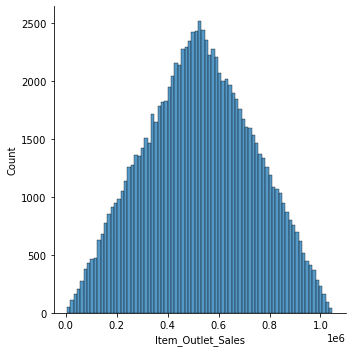

In [25]:
sns.displot(df["Item_Outlet_Sales"])

##### 👉 The target variable "Item_Outlet_Sales" is assumed to follow a normal distribution

In [31]:
df_num.skew()

Item_Weight         -0.006878
Item_Visibility      0.002972
Item_MRP             0.001610
Item_Outlet_Sales    0.002745
Purchase_Qnty        3.498891
Discount             0.702209
dtype: float64

#### Categorical variables visual's using countplot and pie

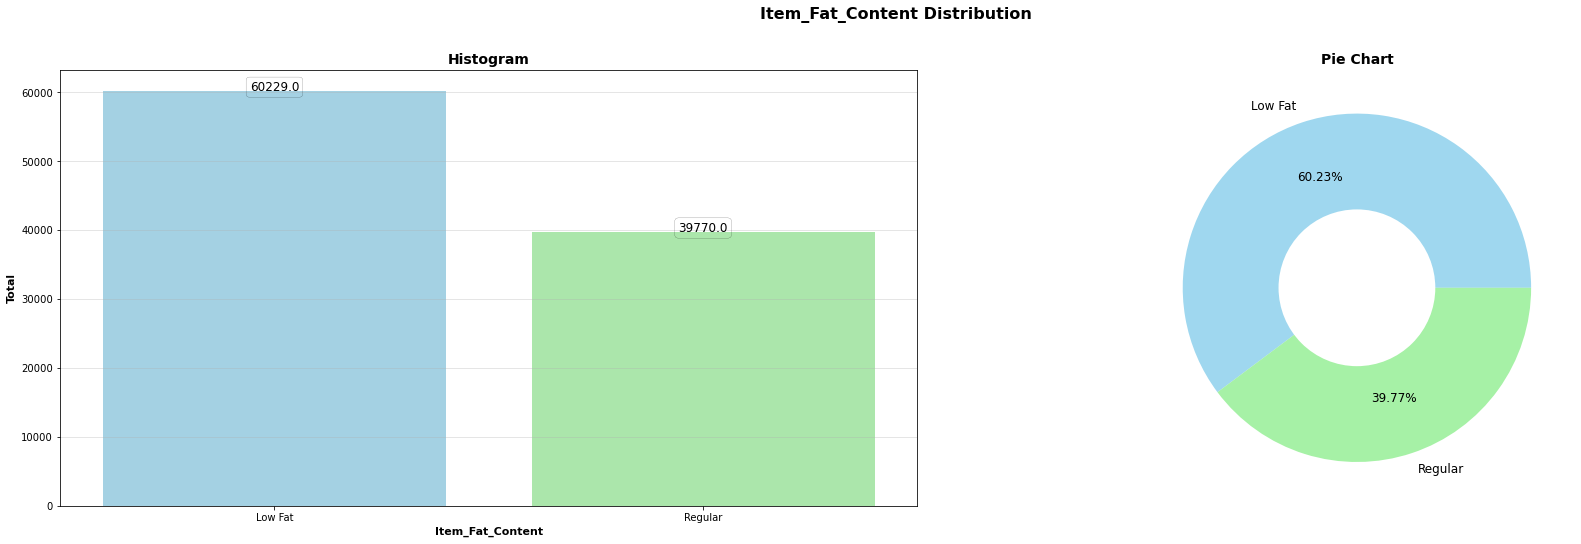

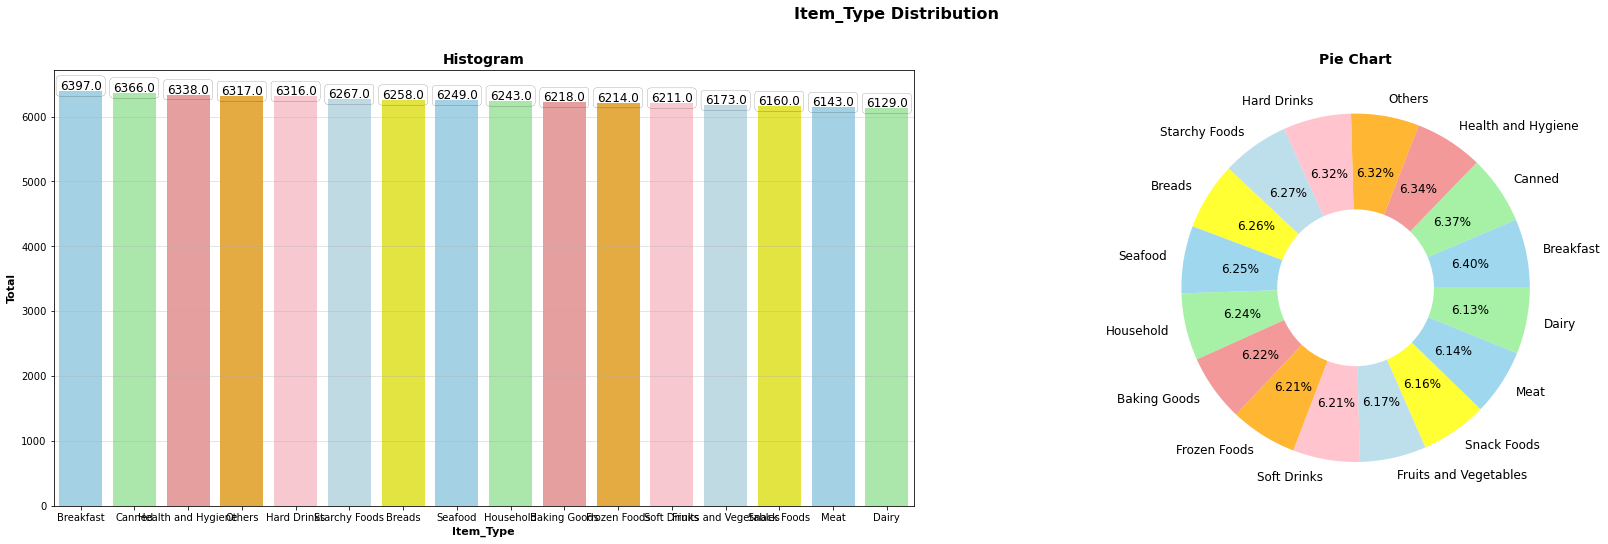

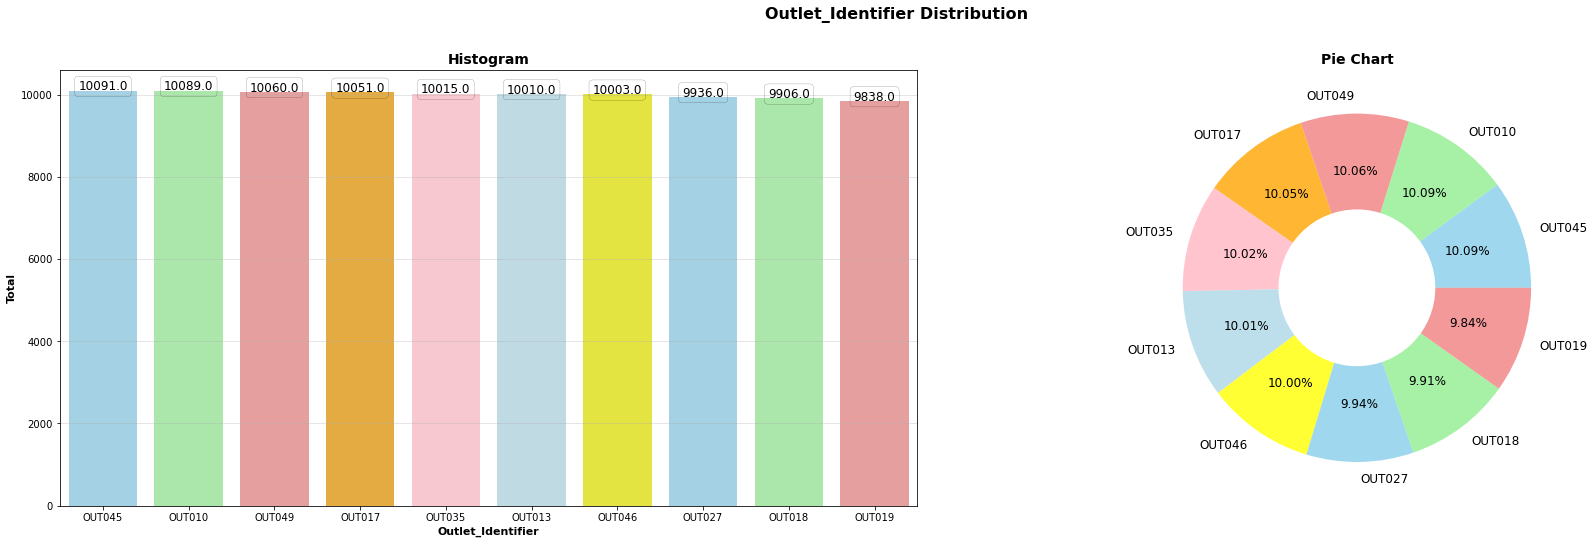

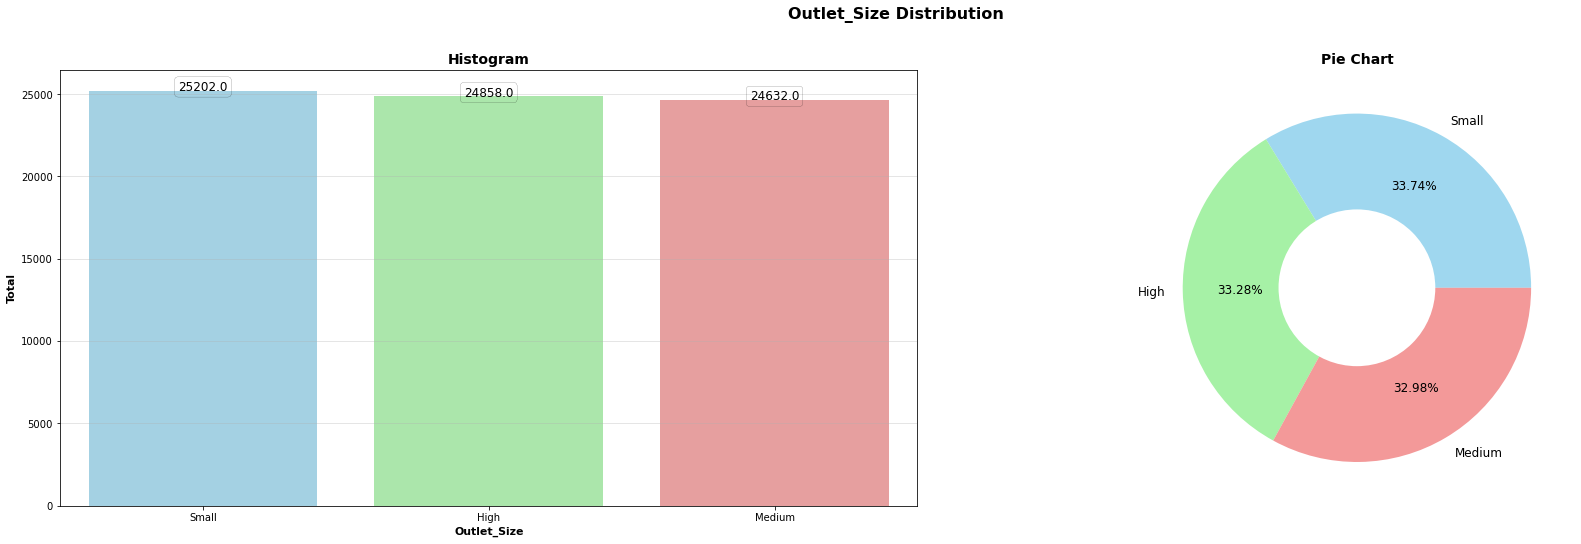

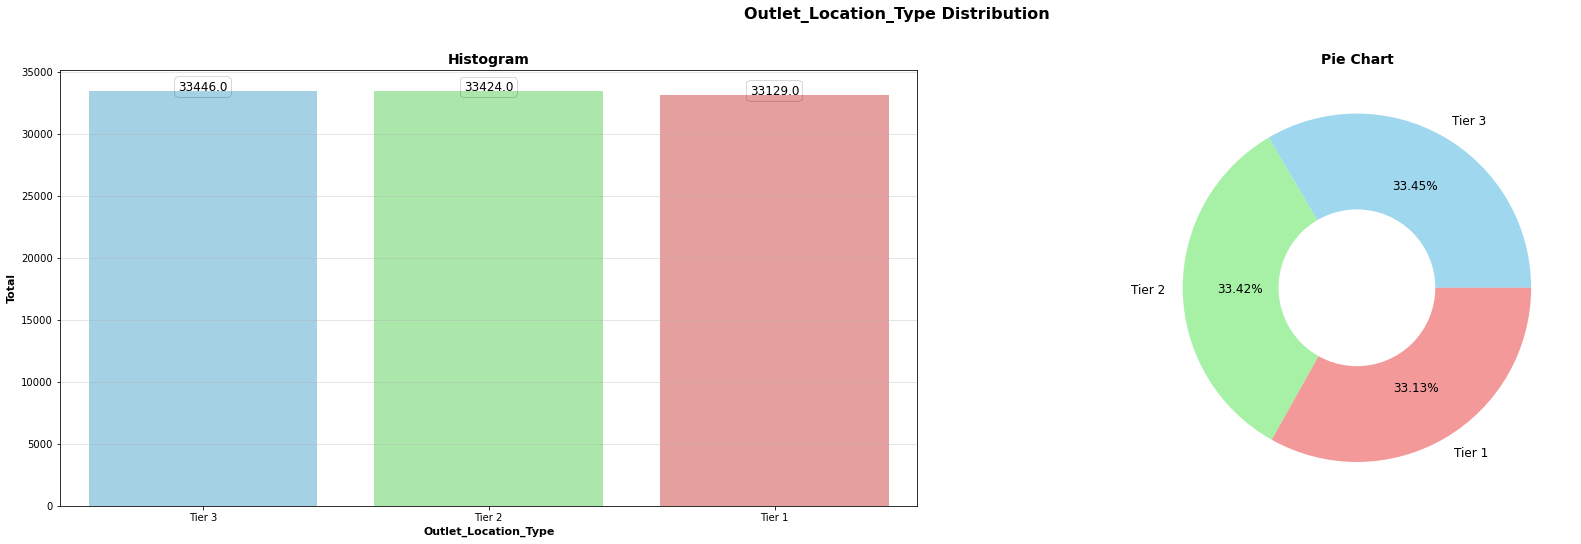

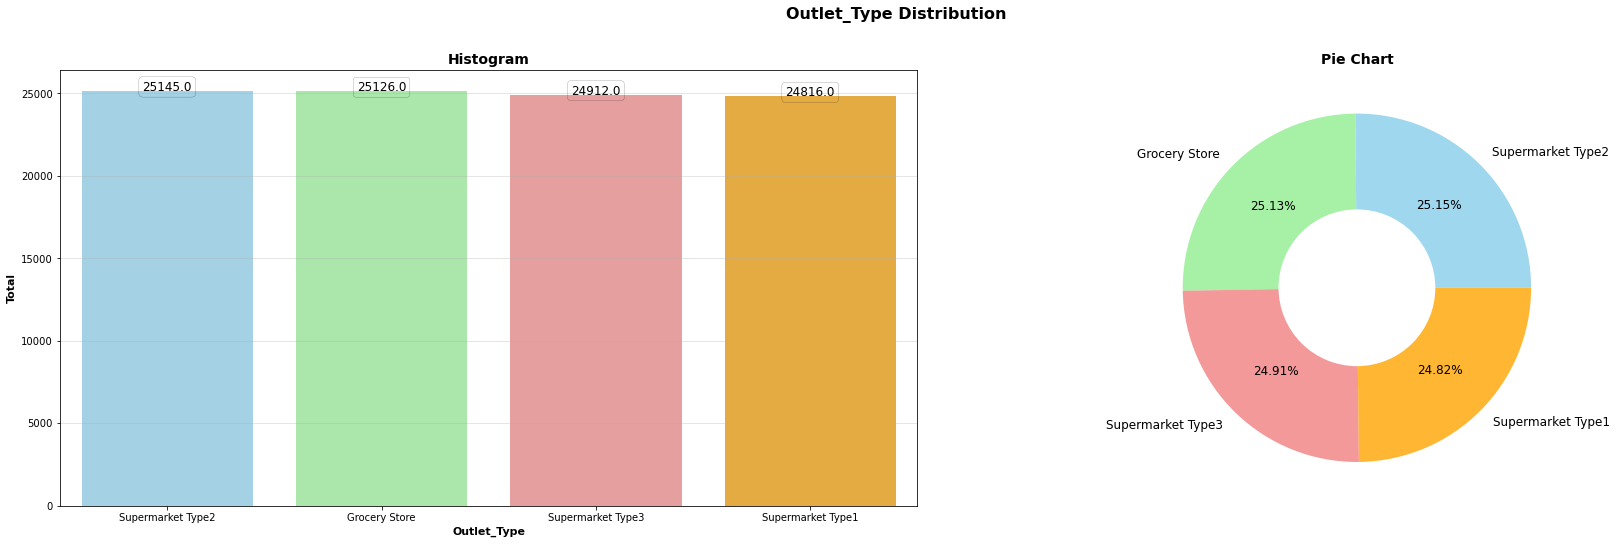

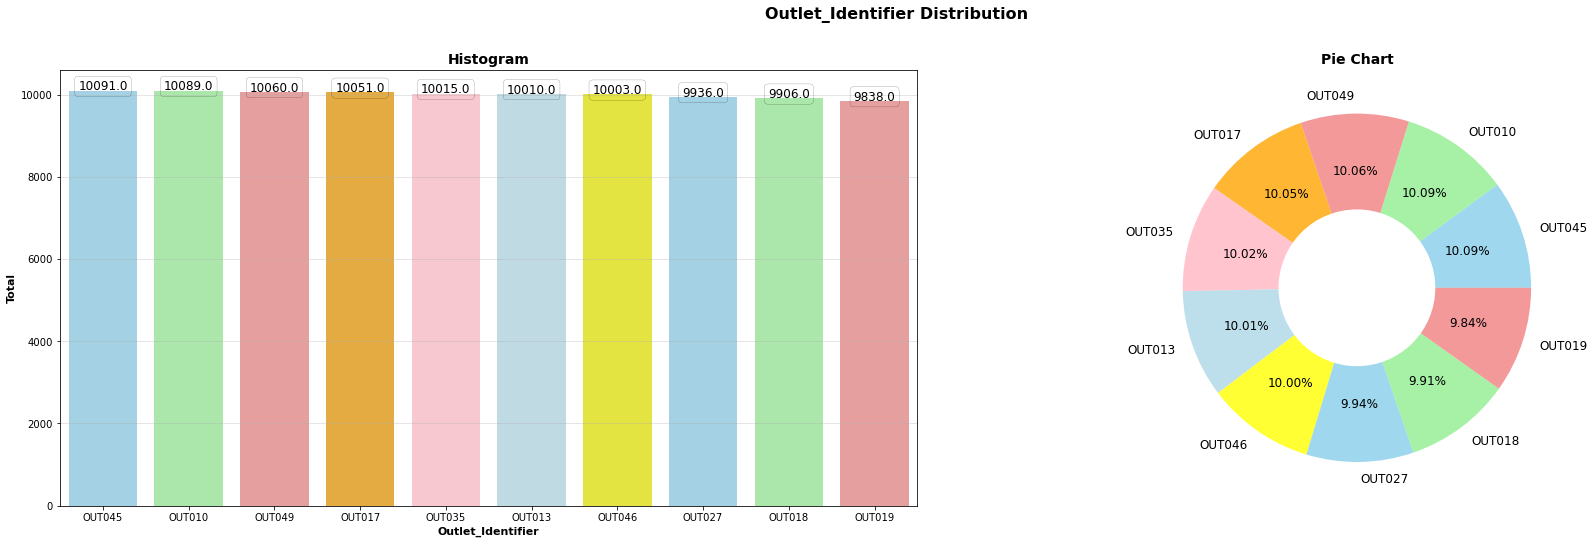

In [34]:
# List to iterate through
columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']
#colors = sns.color_palette('pastel')
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'lightblue', 'yellow']
# Loop through each element in the list
for column in columns:
    # Setting Colors, Labels, Order for each column
    labels = df[column].dropna().unique()
    order = df[column].value_counts().index

    # Size for Both Figures
    plt.figure(figsize=(25, 8))
    plt.suptitle(f'{column} Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif')

    # Histogram
    countplt = plt.subplot(1, 2, 1)
    plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    ax = sns.countplot(x=column, data=df, palette=colors, order=order, alpha=0.85)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center',
                fontsize=12, bbox=dict(facecolor='none', linewidth=0.15, boxstyle='round'))
    plt.tight_layout(rect=[0, 0.04, 1, 0.965])
    plt.xlabel(column, fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
    plt.grid(axis='y', alpha=0.4)

    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    plt.pie(df[column].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
            wedgeprops=dict(alpha=0.8), textprops={'fontsize': 12})
    centre = plt.Circle((0, 0), 0.45, fc='white')
    plt.gcf().gca().add_artist(centre)

    plt.show()

### outlet size
##### 👉 There are 3 types of outlet size, small, medium, and high size.
##### 👉 Medium size becomes the outlet size with the most number.
##### 👉 However, the smallest number outlet size is High size .
##### 👉 There are ten outlets, with almost all the outlets have the same number of outlets (around 10%).
##### 👉 However, OUT27,"OUT18" and "OUT19" have the least number of outlets (around 9%).

# 4.4 Bivariate and Multivariate Analysis

### Heatmap for  Numerical variables 

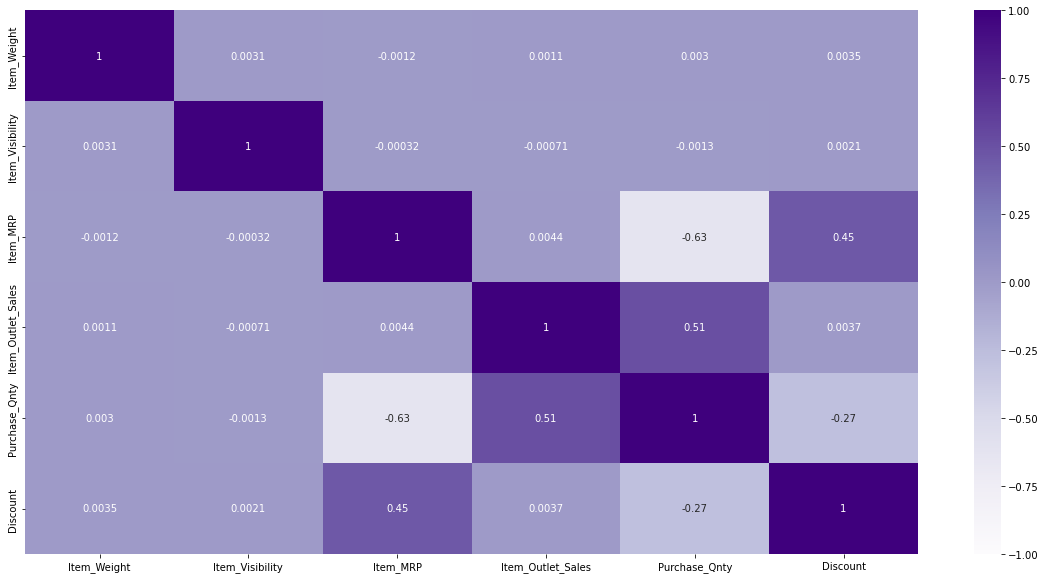

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

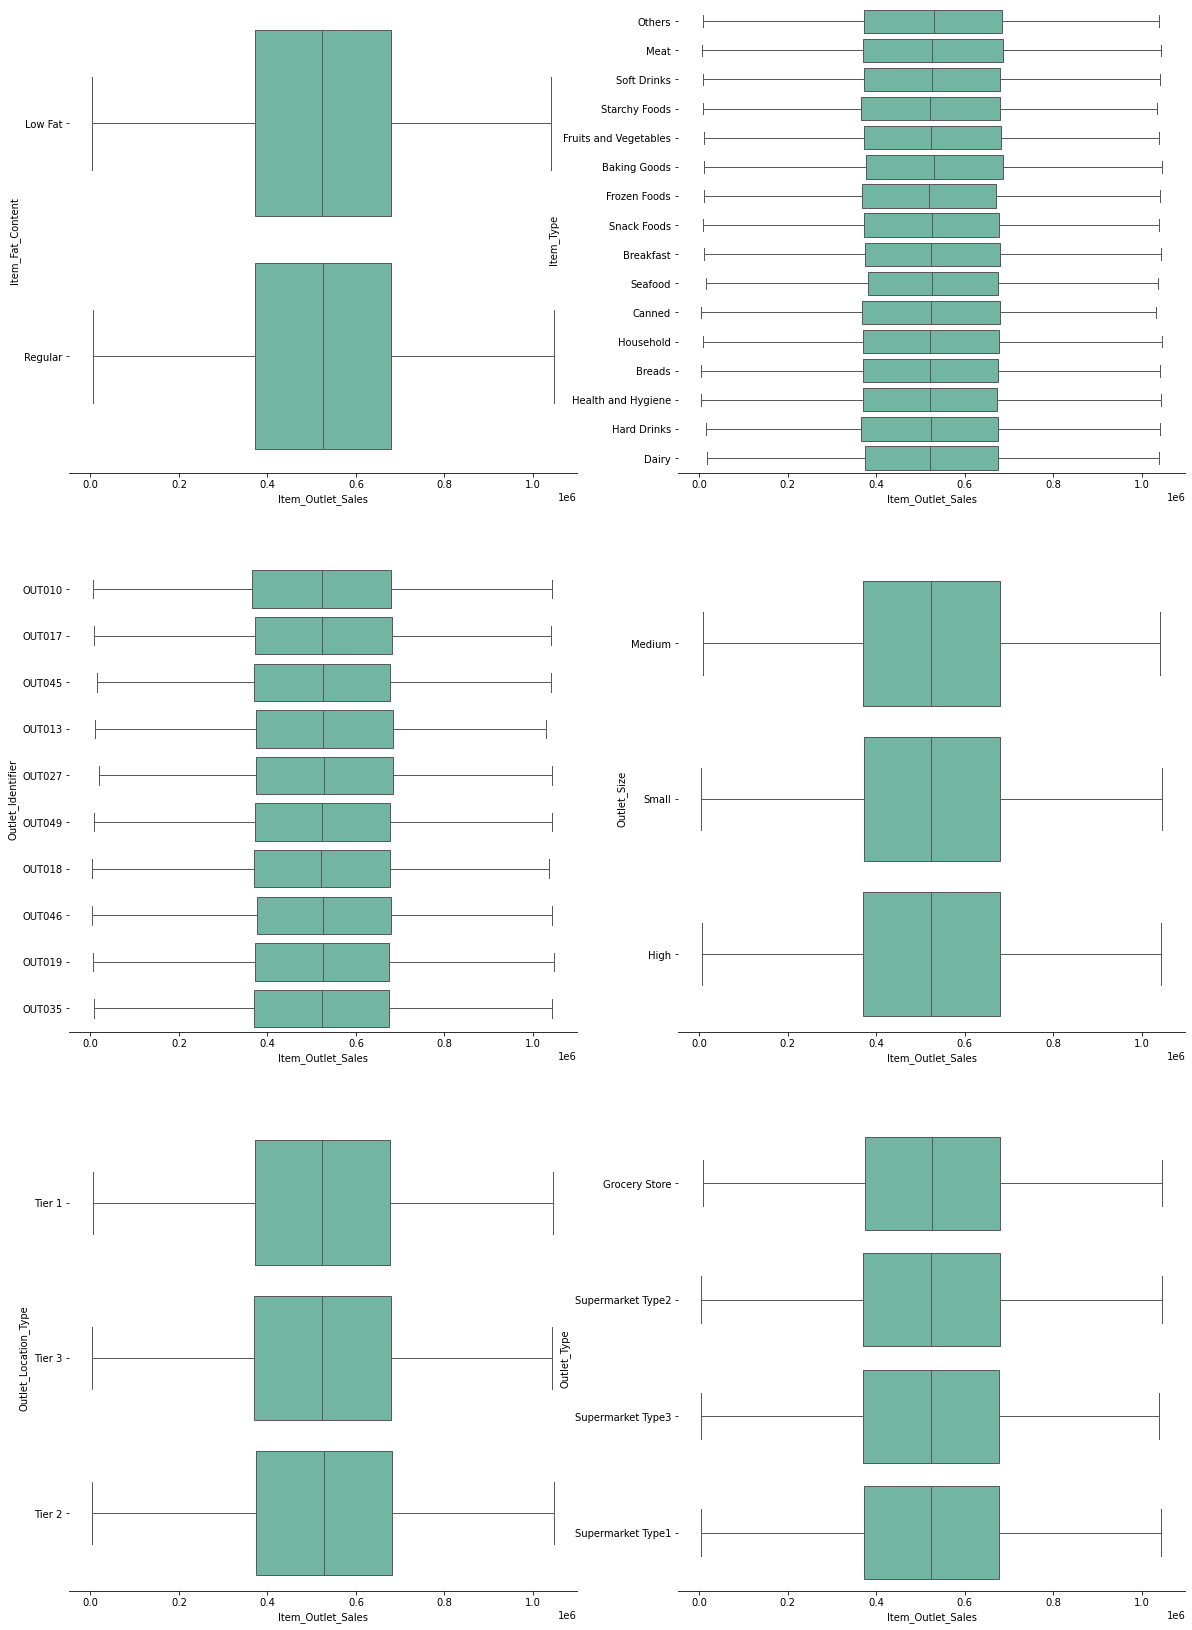

In [36]:
numeric_columns = df_cat.columns
plt.figure(figsize=(20, 60))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(6,2,i+1)
        
        sns.boxplot(x='Item_Outlet_Sales',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) 

<Figure size 720x432 with 0 Axes>

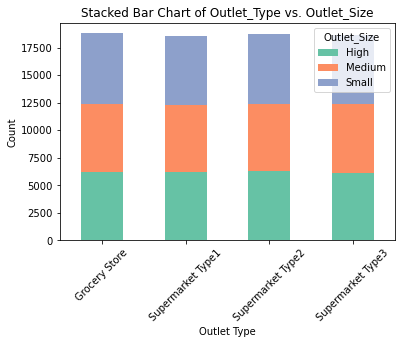

In [37]:
df_stacked = df.groupby(['Outlet_Type', 'Outlet_Size']).size().unstack()
plt.figure(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Outlet_Type vs. Outlet_Size")
plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [38]:
pd.crosstab(df["Item_Fat_Content"],df["Item_Type"]).T

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,3717,2501
Breads,3767,2491
Breakfast,3813,2584
Canned,3811,2555
Dairy,3759,2370
Frozen Foods,3721,2493
Fruits and Vegetables,3715,2458
Hard Drinks,3816,2500
Health and Hygiene,3867,2471


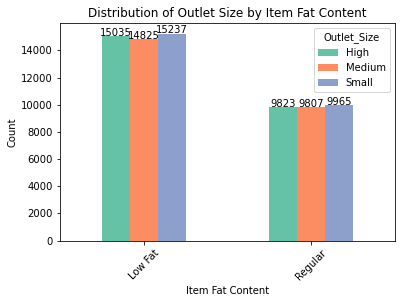

In [39]:
cross_tab = pd.crosstab(df["Item_Fat_Content"], df["Outlet_Size"])
ax = cross_tab.plot(kind='bar')
# Add count labels above the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(i.get_height()), ha='center')

# Customize the plot (add labels, titles, etc. if needed)
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Distribution of Outlet Size by Item Fat Content')
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x4320 with 0 Axes>

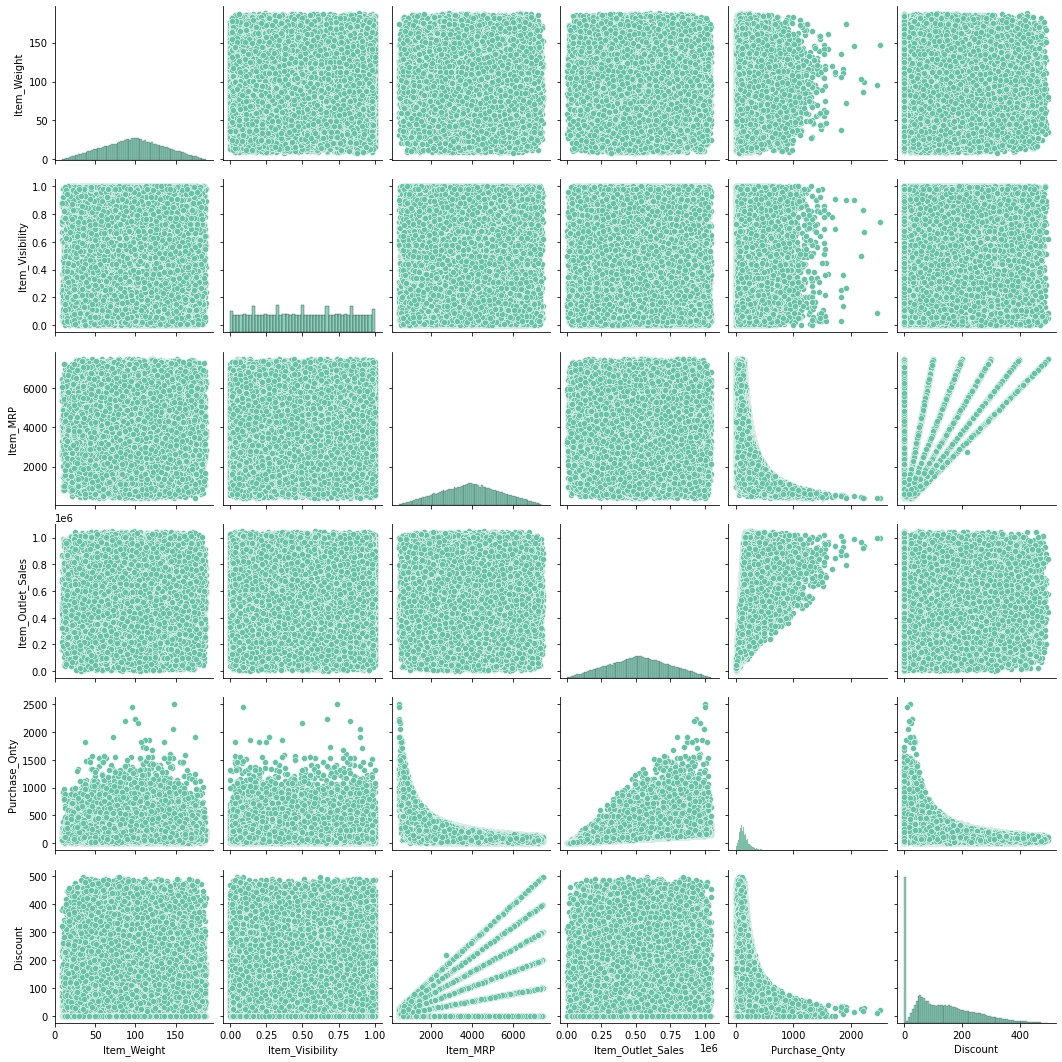

In [40]:
plt.figure(figsize=(20, 60))
sns.pairplot(df)
plt.show()

#####  Multivariate statistics compare more than two variables.
##### we can see the all the plots from the above plots

# 4.5 Missing Value Treatment

In [41]:
import missingno as ms

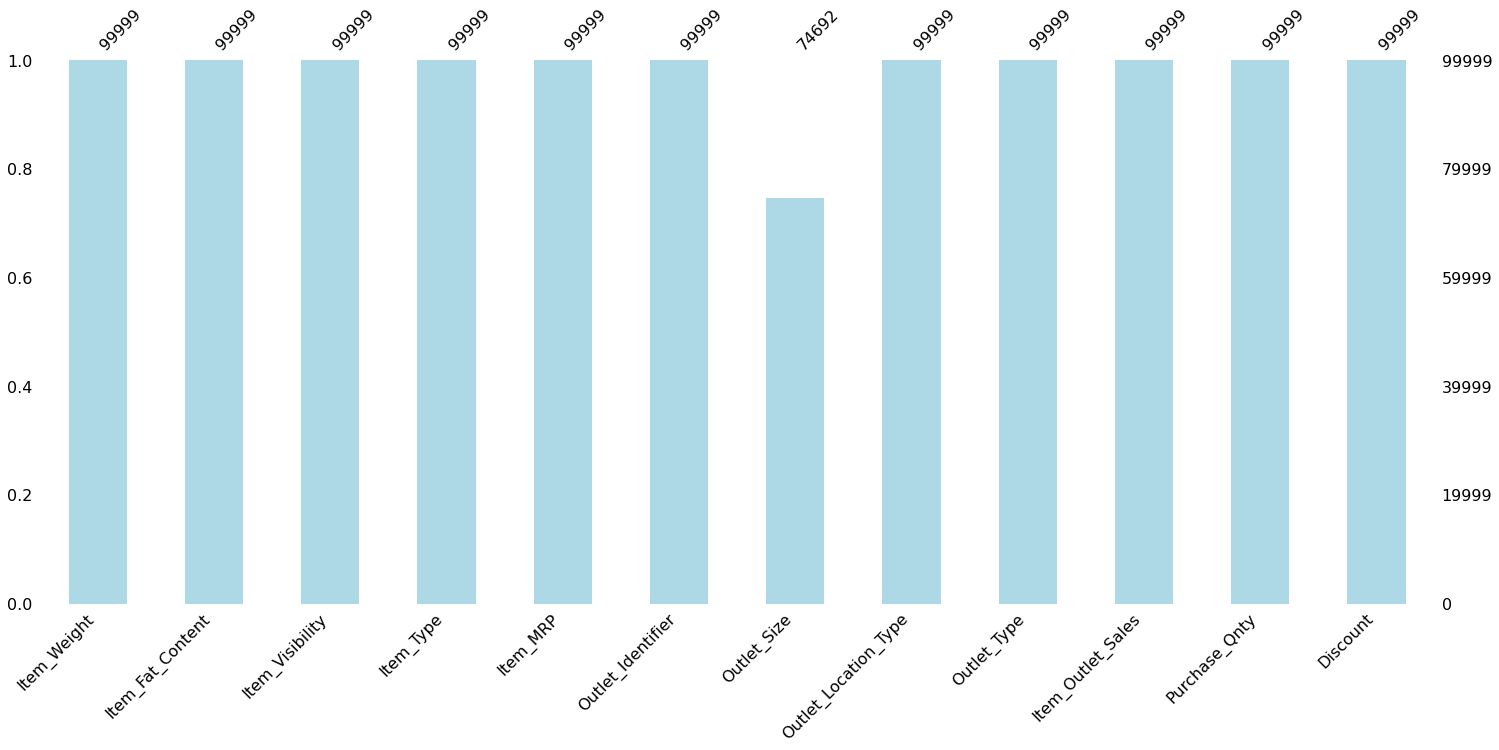

In [42]:
ms.bar(df,color='lightblue')
plt.show()

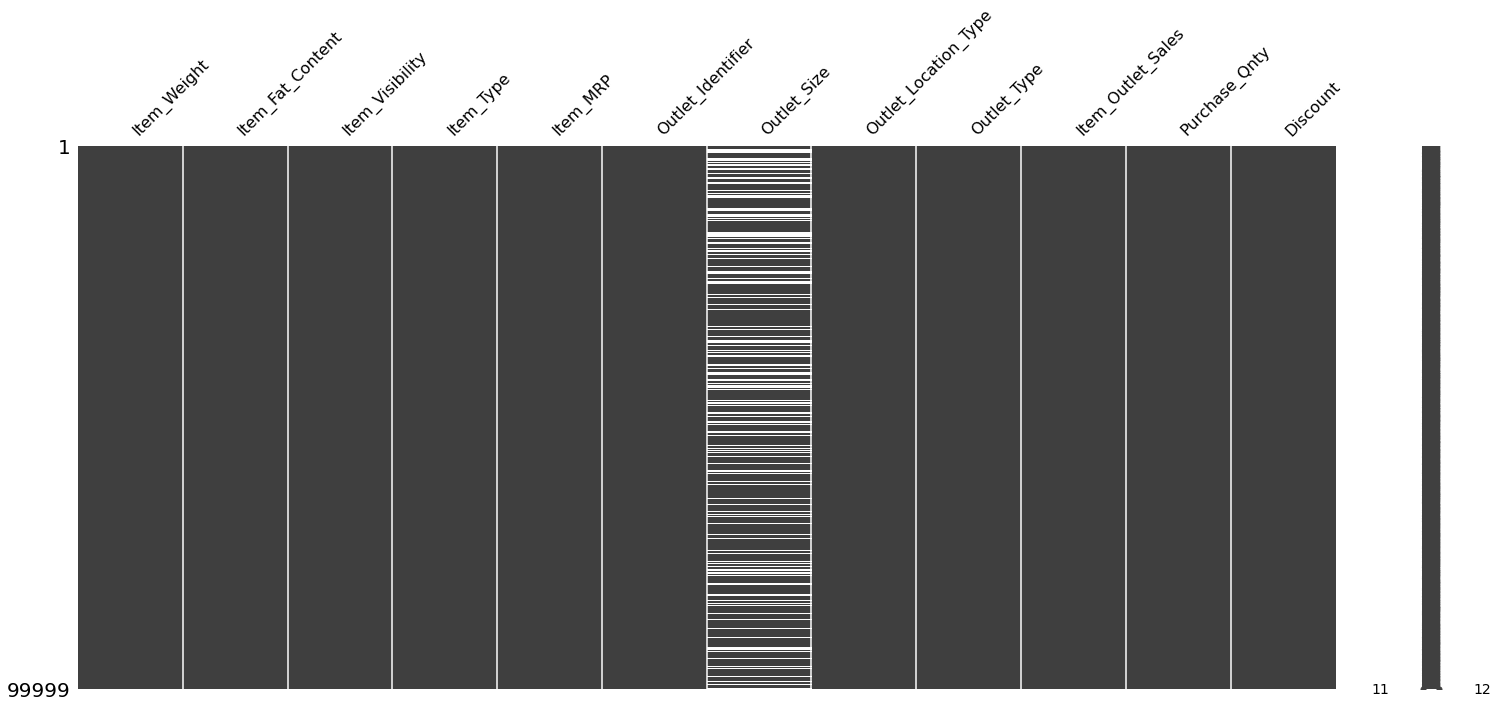

In [43]:
ms.matrix(df)  
plt.show()

In [44]:
def missing_value_percentage(df):
    missvalcount = df.isnull().sum()
    missvalpercent = round(df.isnull().sum() / df.shape[0] * 100)
    dtypes = df.dtypes
    newdf = pd.concat([missvalcount, missvalpercent, dtypes], axis=1)
    newdf.columns = ['missvalcount', 'missval%', 'dtype']
    newdf = newdf[newdf['missvalcount'] != 0].sort_values(by='missvalcount', ascending=False)
    return newdf

In [45]:
missing_value_percentage(df)

,missvalcount,missval%,dtype
Outlet_Size,25307,25.0,object


In [61]:
df['Outlet_Size'].fillna('xmissing_value', inplace=True)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

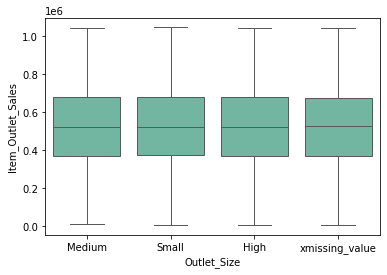

In [62]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

In [63]:
missing_value_percentage(df)

,missvalcount,missval%,dtype


# 4.6 Outliers Analysis

In [64]:
Q1 = df_num.quantile(0.25) 
Q3 = df_num.quantile(0.75) 
IQR = Q3 - Q1 

outlier = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    num_outliers = len(outlier[outlier[i] == True][i])
    if num_outliers > 0:
        print(f'Total number of outliers in column {i} are {num_outliers}')

Total number of outliers in column Purchase_Qnty are 6088
Total number of outliers in column Discount are 631


## 4.6.2 Visualizing outliers using Boxplots & distplot

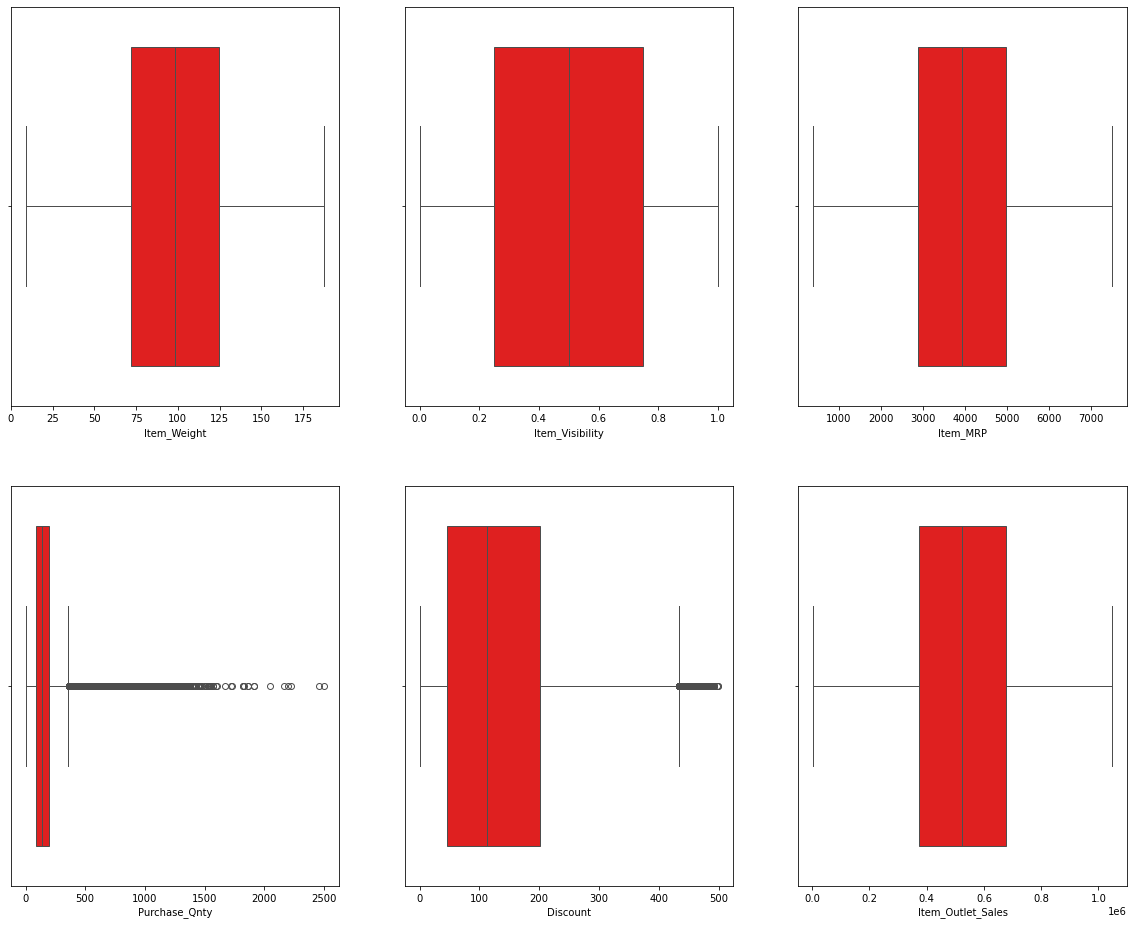

In [65]:
columns_to_plot = ['Item_Weight','Item_Visibility','Item_MRP','Purchase_Qnty','Discount','Item_Outlet_Sales']
plt.figure(figsize=(20, 25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col_name],color='red')
plt.show()

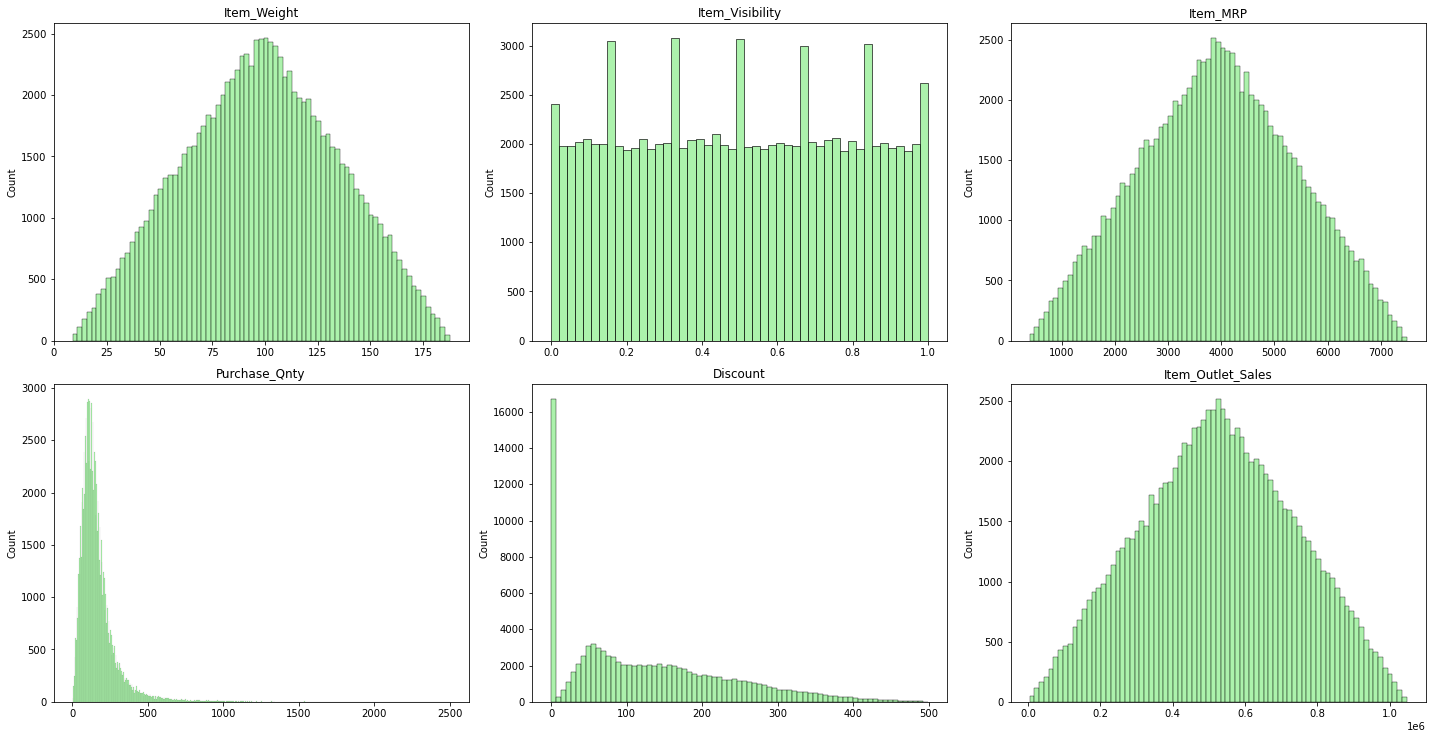

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Purchase_Qnty', 'Discount', 'Item_Outlet_Sales']

plt.figure(figsize=(20, 25))
for i, col_name in enumerate(columns_to_plot, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col_name].values, color='lightgreen') 
    plt.title(col_name)

plt.tight_layout()
plt.show()


## 4.6.3 Removal of Outliers

In [67]:
def outlier(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    filtered_value = df[(df[column_name] > lower_limit) & (df[column_name] < upper_limit)]
    return filtered_value 

In [73]:
df2 = outlier(df3,  "Purchase_Qnty")  
df3 = outlier(df2, "Discount") 

## 4.6.4 After removing outlier ,Visualizing using Boxplots & distplot

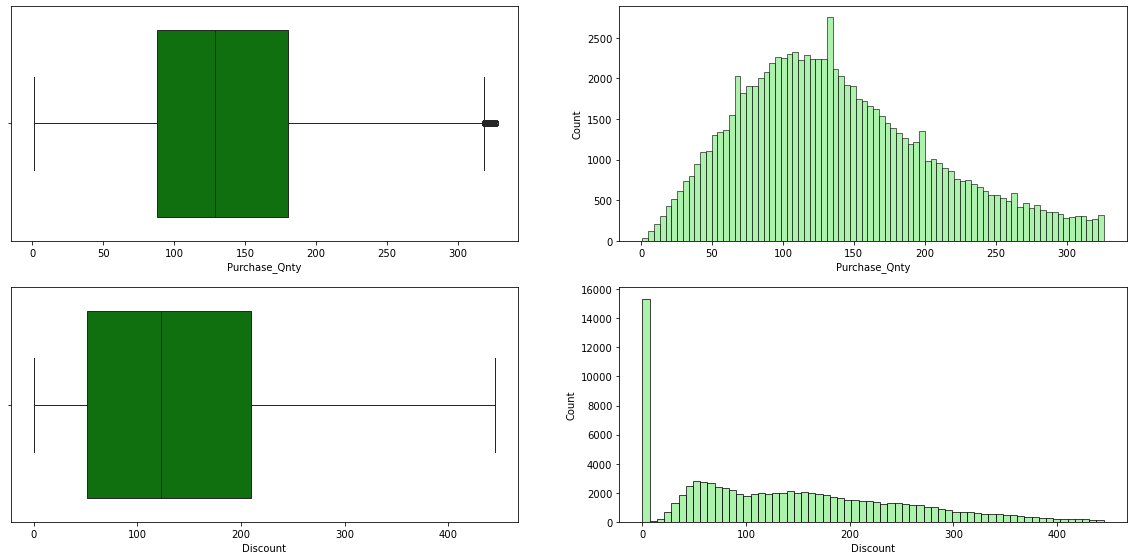

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

plt.subplot(5, 2, 1)
sns.boxplot(x=df3["Purchase_Qnty"], color='green')


plt.subplot(5, 2, 2)
sns.histplot(df3["Purchase_Qnty"], color='lightgreen')


plt.subplot(5, 2, 3)
sns.boxplot(x=df3["Discount"], color='green')


plt.subplot(5, 2, 4)
sns.histplot(df3["Discount"], color='lightgreen')

plt.show()


## 4.7 Encoding 

In [77]:
df = df3.copy()
df_num1 = df.select_dtypes(exclude='object')
df_cat1 = df.select_dtypes(include='object')

In [78]:
categorical_columns = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']
for column in categorical_columns:
    df[column] = ordinalEncoder.fit_transform(df[[column]])

In [79]:
categorical = ['Item_Type','Item_Fat_Content','Outlet_Identifier']
for column in categorical:
    df[column] = LabelEncoder.fit_transform(df[column])

In [80]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Purchase_Qnty,Discount
1,52.94,1,0.15,10,1442.25,2,2.0,2.0,2.0,216188.25,153,57.69
2,97.69,1,0.82,14,3669.00,7,0.0,2.0,3.0,334670.25,94,146.76
3,102.17,1,0.90,15,3419.25,1,0.0,1.0,3.0,514734.00,152,45.59
4,163.37,1,0.12,14,4035.75,0,1.0,0.0,3.0,468666.75,117,53.81
5,65.15,0,0.12,6,3893.25,5,2.0,1.0,0.0,827941.50,215,103.82
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,97.26,0,0.40,9,3636.00,0,2.0,0.0,1.0,400149.75,114,193.92
99995,28.08,0,0.56,1,2162.25,4,1.0,2.0,0.0,608761.50,285,86.49
99996,110.01,0,0.50,5,3939.00,1,0.0,0.0,3.0,219471.00,61,262.60
99997,137.20,1,0.30,8,3453.00,1,0.0,1.0,3.0,783142.50,229,92.08


## 4.8 Data Scaling 

In [81]:
columns_to_scale = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Purchase_Qnty','Discount']
for column in columns_to_scale:
    df[column] = standard_scale.fit_transform(df[[column]])

In [85]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Purchase_Qnty,Discount
1,-1.234680,1,-1.215355,10,-2.039428,2,2.0,2.0,2.0,-1.397611,0.216000,-0.738660
2,-0.011806,1,1.107466,14,-0.345613,7,0.0,2.0,3.0,-0.833945,-0.652117,0.099843
3,0.110618,1,1.384818,15,-0.535590,1,0.0,1.0,3.0,0.022689,0.201286,-0.852569
4,1.783017,1,-1.319362,14,-0.066639,0,1.0,0.0,3.0,-0.196471,-0.313698,-0.775186
5,-0.901020,0,-1.319362,6,-0.175034,5,2.0,1.0,0.0,1.512741,1.128258,-0.304393
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.023557,0,-0.348631,9,-0.370715,0,2.0,0.0,1.0,-0.522433,-0.357840,0.543806
99995,-1.914024,0,0.206073,1,-1.491748,4,1.0,2.0,0.0,0.470015,2.158226,-0.467538
99996,0.324860,0,-0.001941,5,-0.140233,1,0.0,0.0,3.0,-1.381993,-1.137673,1.190358
99997,1.067875,1,-0.695320,8,-0.509917,1,0.0,1.0,3.0,1.299614,1.334251,-0.414914


## 4.9 Train and Test spliting

In [86]:
Features = df.drop('Item_Outlet_Sales',axis = 1)
Target = df['Item_Outlet_Sales']

Features = sm.add_constant(Features)

Xtrain, xtest, Ytrain, ytest = train_test_split(Features,Target,test_size=0.20, random_state=42)

print(f'Xtrain {Xtrain.shape}')
print(f'Ytrain {Ytrain.shape}')

print(f'xtest {xtest.shape}')
print(f'ytest {ytest.shape}')

Xtrain (73407, 12)
Ytrain (73407,)
xtest (18352, 12)
ytest (18352,)


# Variance Inflation Factor (VIF) 

In [87]:
df_numeric_features_vif = Features.select_dtypes(include=[np.number])

In [88]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,11.870462,const
1,1.656394,Item_MRP
2,1.461223,Purchase_Qnty
3,1.182733,Discount
4,1.000182,Outlet_Identifier
5,1.000116,Item_Fat_Content
6,1.000106,Outlet_Type
7,1.000098,Item_Visibility
8,1.000092,Item_Type
9,1.000084,Outlet_Location_Type


In [89]:
for ind in range(len(df_numeric_features_vif.columns)):
    
   
    vif = pd.DataFrame()

    
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    vif["Features"] = df_numeric_features_vif.columns


    multi = vif[vif['VIF_Factor'] > 10]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor              Features
0     1.000057           Item_Weight
1     1.565981      Item_Fat_Content
2     1.000097       Item_Visibility
3     2.835230             Item_Type
4     1.656384              Item_MRP
5     2.749629     Outlet_Identifier
6     2.386435           Outlet_Size
7     2.193751  Outlet_Location_Type
8     2.367712           Outlet_Type
9     1.461222         Purchase_Qnty
10    1.182731              Discount


# Build the multiple linear regression model using the OLS method.

In [90]:
MLR = sm.OLS(Ytrain, Xtrain).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 3.529e+04
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:46:00   Log-Likelihood:                -36709.
No. Observations:               73407   AIC:                         7.344e+04
Df Residuals:                   73395   BIC:                         7.355e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0048      0.005      0.944      0.345      -0.005       0.015
Item_Weight             -0.0019      0.001     -1.291      0.197      -0.005       0.001
Item_Fat_Content        -0.0005      0.003     -0.163      0.871      -0.006       0.005
Item_Visibility         -0.0012      0.001     -0.829      0.407      -0.004       0.002
Item_Type             -3.02e-06      0.000     -0.009      0.992      -0.001       0.001
Item_MRP                 0.7498      0.002    395.655      0.000       0.746       0.754
Outlet_Identifier        0.0001      0.001      0.221      0.825      -0.001       0.001
Outlet_Size             -0.0007      0.001     -0.530      0.596      -0.003       0.002
Outlet_Location_Type    -0.0037      0.002     -2.046      0.041      -0.007      -0.000
Outlet_Type             -0.0007      0.001     -0.521      0.602      -0.003       0.002
Purchase_Qnty            1.0985      0.002    617.384      0.000       1.095       1.102
Discount                -0.0204      0.002    -12.756      0.000      -0.024      -0.017
==============================================================================
Omnibus:                    16521.508   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36583.049
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                       5.290   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### calculate p-values for all the independent variables in the MLR_model

In [91]:
MLR_pvalues = pd.DataFrame(MLR.pvalues, columns = ["P-Value"])
MLR_pvalues

,P-Value
const,3.453665e-01
Item_Weight,1.965580e-01
Item_Fat_Content,8.708798e-01
Item_Visibility,4.073164e-01
Item_Type,9.924538e-01
Item_MRP,0.000000e+00
Outlet_Identifier,8.247995e-01
Outlet_Size,5.957753e-01
Outlet_Location_Type,4.074725e-02
Outlet_Type,6.023731e-01


### Create a list of insignificant variables

In [92]:
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

insigni_var = insignificant_var.index

insigni_var = insigni_var.to_list()
insigni_var

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type']

In [93]:
r_sq_mlr = MLR.rsquared
r_sq_mlr

0.8409890833147913

In [94]:
adj_r_sq = MLR.rsquared_adj
adj_r_sq

0.8409652517174953

##### Feature Importence

In [95]:

feature_importances = abs(MLR.params)

sorted_feature_importances = feature_importances.sort_values(ascending=False)

print(sorted_feature_importances)


Purchase_Qnty           1.098510
Item_MRP                0.749817
Discount                0.020399
const                   0.004774
Outlet_Location_Type    0.003693
Item_Weight             0.001904
Item_Visibility         0.001220
Outlet_Size             0.000697
Outlet_Type             0.000686
Item_Fat_Content        0.000489
Outlet_Identifier       0.000113
Item_Type               0.000003
dtype: float64


# Model Performance

In [97]:
train_pred = MLR.predict(Xtrain)

test_pred = MLR.predict(xtest)

# Mean Squared Error (MSE)

In [98]:
# calculate the MSE for the train data
mse_train = round(mean_squared_error(Ytrain, train_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
mse_test = round(mean_squared_error(ytest, test_pred),4)

print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.1592
Mean Squared Error (MSE) on test set:  0.1572


# Root Mean Squared Error (RMSE)

In [99]:
# MSE for the train data
mse_train = mean_squared_error(Ytrain, train_pred)

# take the square root of the MSE to calculate the RMSE
rmse_train = round(np.sqrt(mse_train), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(ytest, test_pred)

# take the square root of the MSE to calculate the RMSE
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.399
Root Mean Squared Error (RMSE) on test set:  0.3965


# Adaboost regressor

In [100]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [101]:
adc = AdaBoostRegressor()

In [102]:
adc.fit(Xtrain,Ytrain)

AdaBoostRegressor()

In [104]:
ypred = adc.predict(xtest)

In [105]:
r2_score(ytest,ypred)

0.8702591917766052

# Hyperparamterer Tunning

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor


adc = AdaBoostRegressor()


param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  
    
}



In [125]:

# Create the GridSearchCV object
grid_search = GridSearchCV(adc, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(Xtrain, Ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best model
ypred = best_estimator.predict(xtest)

# Calculate the evaluation metrics
r2 = r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)

# Print the results
print("Best Hyperparameters:", best_params)
print("R-squared with Best Model:", r2)
print("Mean Squared Error with Best Model:", mse)
print("Mean Absolute Error with Best Model:", mae)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}
R-squared with Best Model: 0.888221795571289
Mean Squared Error with Best Model: 0.11130321118526293
Mean Absolute Error with Best Model: 0.2758004367603966


# Model Comparsion

In [135]:
# Metrics for Multiple Linear Regression
print(" Linear Regression Metrics:")
print("R-squared:", r_sq_mlr)
print("Mean Squared Error:", mean_squared_error(ytest, MLR.predict(xtest)))
print("Mean Absolute Error:", mean_absolute_error(ytest, MLR.predict(xtest)))
print()

# Metrics for AdaBoost Regressor
print("AdaBoost Regressor Metrics:")
print("R-squared:", r2_score(ytest, ypred))
print("Mean Squared Error:", mean_squared_error(ytest, ypred))
print("Mean Absolute Error:", mean_absolute_error(ytest, ypred))


 Linear Regression Metrics:
R-squared: 0.8409890833147913
Mean Squared Error: 0.1572197293279901
Mean Absolute Error: 0.29657960758064106

AdaBoost Regressor Metrics:
R-squared: 0.888221795571289
Mean Squared Error: 0.11130321118526293
Mean Absolute Error: 0.2758004367603966


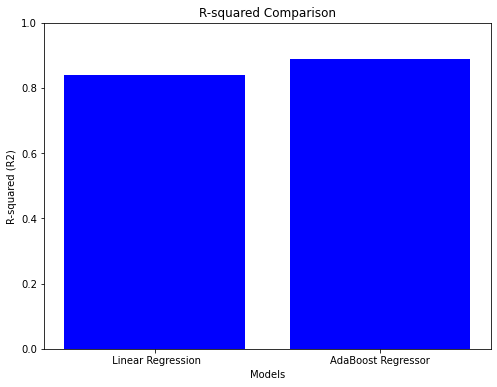

In [136]:
import matplotlib.pyplot as plt


model_names = [" Linear Regression", "AdaBoost Regressor"]
r2_values = [r_sq_mlr, r2_score(ytest, ypred)]


plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_values, color='b')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('R-squared Comparison')
plt.ylim(0, 1)  
plt.show()


AdaBoost Regressor: The Best Model

    
    
   The R-squared (R2) value of 0.8882 for the AdaBoost Regressor model indicates that approximately 88.82% of the variance in the sales data is explained by the model's predictions. This is a strong R-squared value, suggesting that the model provides a good fit to the data and captures a significant portion of the variation in sales. In other words, the AdaBoost Regressor is highly effective in explaining and predicting the sales of products in the context of the BigMart dataset.


# CONCLUSION

In conclusion, the development of a machine learning model to predict sales for individual products in various BigMart stores

Predictive Model:
 
    The creation of a robust predictive model using historical sales data, product attributes, and store information demonstrates the potential of data-driven solutions in retail. The model, with its ability to forecast sales, serves as a powerful tool for BigMart's sales and inventory management.

Optimization:

    The project's focus on optimizing the model's performance, as indicated by the minimization of the mean squared error (MSE) and other relevant evaluation metrics, underscores the commitment to accuracy and precision. A well-optimized model results in more reliable sales predictions, ultimately leading to better decision-making.

Inventory Management: 
    
    The insights gained from the model's predictions are invaluable for inventory management. BigMart can make informed decisions about stocking levels, reorder points, and the allocation of products across different stores. This contributes to efficient inventory control and reduced carrying costs.

Sales Strategy:

    The model provides guidance for sales and marketing strategies. BigMart can tailor its promotions, pricing, and product placement based on the model's recommendations. This ensures that products are marketed to the right audience at the right time.

Data-Driven Decision-Making:

    The project underscores the importance of data-driven decision-making in the retail industry. By harnessing machine learning, BigMart can adapt to market fluctuations, customer preferences, and seasonal variations more effectively.

Continuous Improvement: 

    It's important to acknowledge that the model is not static. Regular updates and retraining with fresh data are necessary to maintain accuracy over time. The project sets the stage for ongoing refinement and adaptation to changing market dynamics.
    
    

In summary, the development of a machine learning model for sales prediction at BigMart stores is a forward-looking approach to retail management. It aligns with the industry's shift toward data-driven strategies and provides a foundation for optimizing inventory management, enhancing sales strategies, and ultimately improving profitability. The success of this project offers a glimpse into the potential of predictive analytics in retail and the benefits it can bring to both businesses and customers.

# save the file

In [152]:
from joblib import dump

In [153]:
import joblib

In [154]:
from joblib import dump

# Usage example
joblib.dump(df, r"D:\ML project\df.sav")


['D:\\ML project\\df.sav']

In [155]:
joblib.dump(adc,r"D:\ML project\adc.sav")

['D:\\ML project\\adc.sav']